In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
# def get_contour_precedence(contour, cols):
#     tolerance_factor = 10
#     origin = cv2.boundingRect(contour)
#     return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

In [5]:
def square(img):
    """
    This function resize non square image to square one (height == width)
    :param img: input image as numpy array
    :return: numpy array
    """

    # image after making height equal to width
    squared_image = img

    # Get image height and width
    h = img.shape[0]
    w = img.shape[1]

    # In case height superior than width
    if h > w:
        diff = h-w
        if diff % 2 == 0:
            x1 = np.zeros(shape=(h, diff//2))
            x2 = x1
        else:
            x1 = np.zeros(shape=(h, diff//2))
            x2 = np.zeros(shape=(h, (diff//2)+1))

        squared_image = np.concatenate((x1, img, x2), axis=1)

    # In case height inferior than width
    if h < w:
        diff = w-h
        if diff % 2 == 0:
            x1 = np.zeros(shape=(diff//2, w))
            x2 = x1
        else:
            x1 = np.zeros(shape=(diff//2, w))
            x2 = np.zeros(shape=((diff//2)+1, w))

        squared_image = np.concatenate((x1, img, x2), axis=0)

    return squared_image

In [6]:
# def sort(vector):
#     sort = True
#     while (sort == True):

#         sort = False
#         for i in range(len(vector) - 1):
#             x_1 = vector[i][0]
#             y_1 = vector[i][1]

#             for j in range(i + 1, len(vector)):

#                 x_2 = vector[j][0]
#                 y_2 = vector[j][1]

#                 if (x_1 >= x_2 and y_2 >= y_1):
#                     tmp = vector[i]
#                     vector[i] = vector[j]
#                     vector[j] = tmp
#                     sort = True

#                 elif (x_1 < x_2 and y_2 > y_1):
#                     tmp = vector[i]
#                     vector[i] = vector[j]
#                     vector[j] = tmp
#                     sort = True
#     return vector

In [7]:
# def plate_segmentation(img_file_path):

#     img = cv2.imread(img_file_path)
#     imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     height = img.shape[0]
#     width = img.shape[1]
#     area = height * width

#     scale1 = 0.001
#     scale2 = 0.1
#     area_condition1 = area * scale1
#     area_condition2 = area * scale2
#     # global thresholding
#     ret1,th1 = cv2.threshold(imgray,127,255,cv2.THRESH_BINARY)

#     # Otsu's thresholding
#     ret2,th2 = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#     # Otsu's thresholding after Gaussian filtering
#     blur = cv2.GaussianBlur(imgray,(5,5),0)
#     ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#     contours, hierarchy = cv2.findContours(th3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#     # sort contours
#     contours = sorted(contours, key=cv2.contourArea, reverse=True)

#     cropped = []
#     for cnt in contours:
#         (x,y,w,h) = cv2.boundingRect(cnt)


#         if (w * h > area_condition1 and w * h < area_condition2 and w/h > 0.3 and h/w > 0.3):
#             cv2.drawContours(img, [cnt], 0, (0, 255, 0), 3)
#             cv2.rectangle(img, (x,y), (x+w,y+h), (255, 0, 0), 2)
#             c = th2[y:y+h,x:x+w]
#             c = np.array(c)
#             c = cv2.bitwise_not(c)
#             c = square(c)
#             c = cv2.resize(c,(28,28), interpolation = cv2.INTER_AREA)
#             cropped.append(c)
#     cv2.imwrite('detection.png', img)
#     return cropped

In [8]:
# cropped = plate_segmentation('./mm-plate.jpg')

In [9]:
# type(cropped[0])

### <p style="color:cyan;">Breaking down the **Segmentation**</p>
[imagesearch-link](https://www.pyimagesearch.com/2014/09/08/thresholding-simple-image-segmentation-using-opencv/)

In [10]:
image_path = './mm-plate.jpg'

In [11]:
image_array = cv2.imread(image_path)

In [12]:
type(image_array)

NoneType

In [13]:
image_array_gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
type(image_array_gray)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


TypeError: Image data of dtype object cannot be converted to float

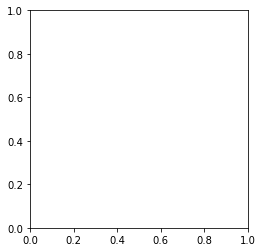

In [14]:
plt.imshow(image_array)

In [ ]:
plt.imshow(image_array_gray)

In [15]:
original_image_height = image_array.shape[0]
gray_image_height = image_array_gray.shape[0]
original_image_height == gray_image_height

AttributeError: 'NoneType' object has no attribute 'shape'

In [11]:
height = image_array.shape[0]
width = image_array.shape[1]
area = height * width
print(height, width, area)

898 1928 1731344


In [12]:
scale_one = 0.001
scale_two = 0.1
area_condition_one = area * scale_one
area_condition_two = area * scale_two
print(area_condition_one, area_condition_two)

1731.344 173134.40000000002


In [13]:
methods = [
	("THRESH_BINARY", cv2.THRESH_BINARY),
	("THRESH_BINARY_INV", cv2.THRESH_BINARY_INV),
	("THRESH_TRUNC", cv2.THRESH_TRUNC),
	("THRESH_TOZERO", cv2.THRESH_TOZERO),
	("THRESH_TOZERO_INV", cv2.THRESH_TOZERO_INV),
    ("THRESH_OTSU", cv2.THRESH_OTSU)]

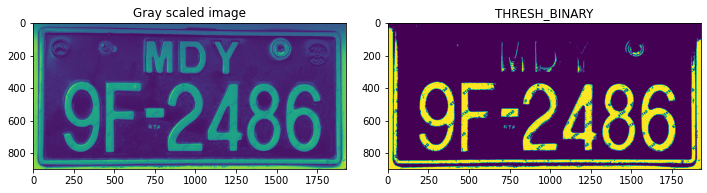

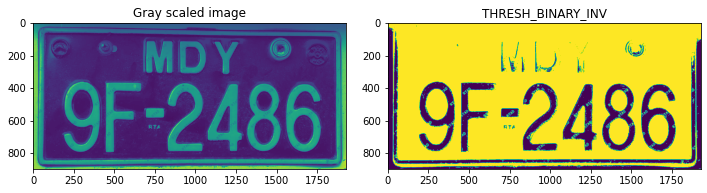

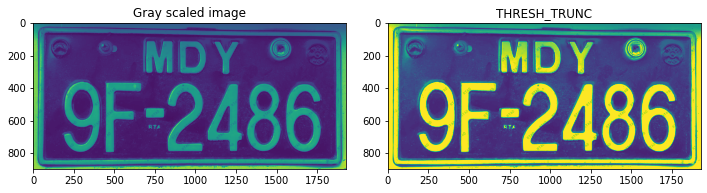

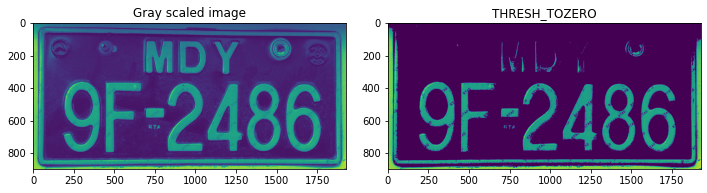

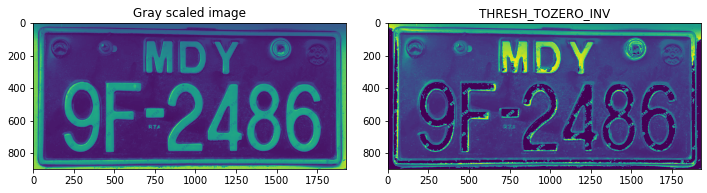

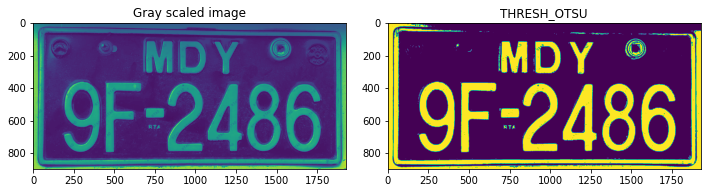

In [14]:
threshold = 127
for (threshName, threshMethod) in methods: #threshMethod is just 0 to 8 or smth
    (T, thresh_image) = cv2.threshold(src=image_array_gray, thresh=threshold, maxval=255, type=threshMethod)
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10, 7.5))
    fig.tight_layout()
    axes[0].imshow(image_array_gray)
    axes[0].set_title('Gray scaled image')

    axes[1].imshow(thresh_image)
    axes[1].set_title(threshName)
#If a pixel in the input image passes the threshold test, it will have the value set to 255. (THRESH_BINARY)
#leaves the pixel intensities as they are if the source pixel is not greater than the supplied threshold. (THRESH_TRUNC)
#cv2.THRESH_TOZERO  which sets the source pixel to zero if the source pixel is not greater than the supplied threshold

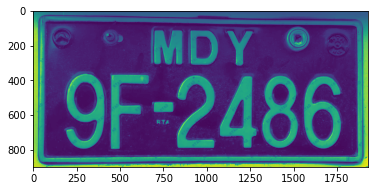

In [15]:
blur = cv2.GaussianBlur(src=image_array_gray, ksize=(5,5), sigmaX=0)
plt.imshow(blur)

In [16]:
T,thresh_image_blured = cv2.threshold(src=blur,thresh=0, maxval=255, type=cv2.THRESH_OTSU)

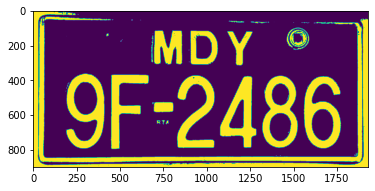

In [17]:
plt.imshow(thresh_image_blured)

In [18]:
# T, thresh_image = cv2.threshold(src=image_array_gray ,thresh=0, maxval=255, type=cv2.THRESH_OTSU)

In [19]:
# plt.hist(image_array.ravel(),256,[0,256])
# plt.show()
# plt.hist(image_array_gray.ravel(),256,[0,256])
# plt.show()
# plt.hist(thresh_image.ravel(),256,[0,256])
# plt.show()
# plt.hist(blur.ravel(),256,[0,256])
# plt.show()
# plt.hist(thresh_image_blured.ravel(),256,[0,256])
# plt.show()

In [18]:
contours, hierarchy = cv2.findContours(thresh_image_blured, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

## **Contours**

In [ ]:
for i in range(5):
    print(contours[i][0])
    print(contours[i][1])
    print(contours[i])

In [ ]:
print('length',str(len(contours)))
print('type', str(type(contours)))
print('length at 3 is ', str(len(contours[2])))
print('-',contours[2][1][0][1])
print('--', contours[2][4])
print(contours[2])

In [19]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [19]:
print('length at 0 is ', str(len(contours[0])))
for i in range(len(contours[0])):
    if i == 567:
        print(contours[0][i])

length at 0 is  598
[[169  13]]


In [2]:
img = cv2.imread(image_path)
sq = list()
nsq = list()
cropped = list()
for cnt in contours:
    (x,y,w,h) = cv2.boundingRect(cnt)
    if (w * h > area_condition_one and w * h < area_condition_two and w/h > 0.3 and h/w > 0.3):
        #cv2.drawContours(img, [cnt], 0, (0, 255, 0), 3)
        cv2.rectangle(img, (x,y), (x+w,y+h), (255, 0, 0), 2)
        c = thresh_image_blured[y:y+h,x:x+w]
        c = np.array(c)
        c = cv2.bitwise_not(c)
        nsq.append(c)
        c = square(c)
        sq.append(c)
        c = cv2.resize(c,(28,28), interpolation = cv2.INTER_AREA)
        cropped.append(c)
        plt.imshow(img)
        #cv2.imwrite('detection.png', img)
    #return cropped
    #test = cv2.rectangle(image_array_test, (x,y), (x+w,y+h), (255, 0, 0), 2)
    #test= cv2.drawContours(image_array, [cnt], 0, (0, 255, 0), 3)

NameError: name 'cv2' is not defined

In [21]:
type(sq[0])

numpy.ndarray

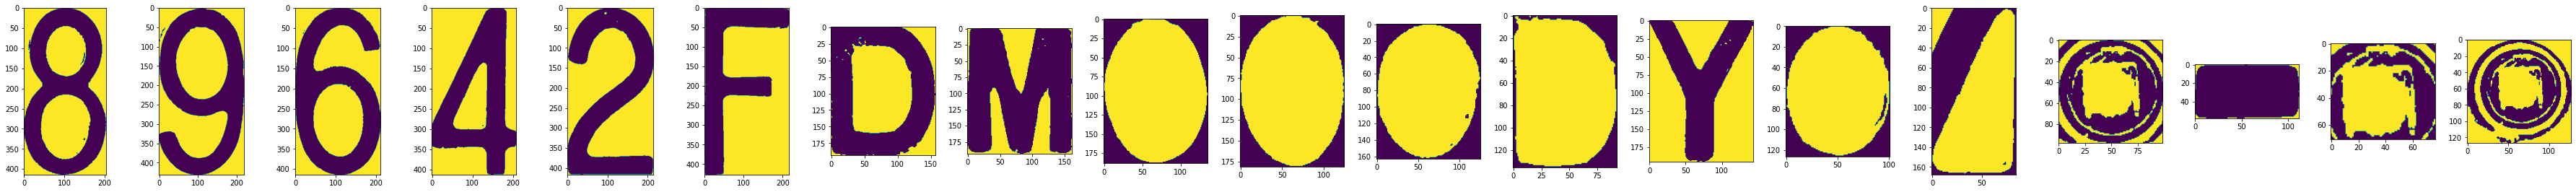

In [23]:
fig, axes = plt.subplots(nrows=1,ncols=len(nsq)-1, figsize=(50, 3.8))
fig.tight_layout()
for i in range(len(nsq)-1):
    axes[i].imshow(nsq[i])

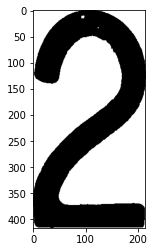

In [27]:
plt.imshow(nsq[4], cmap='gray')

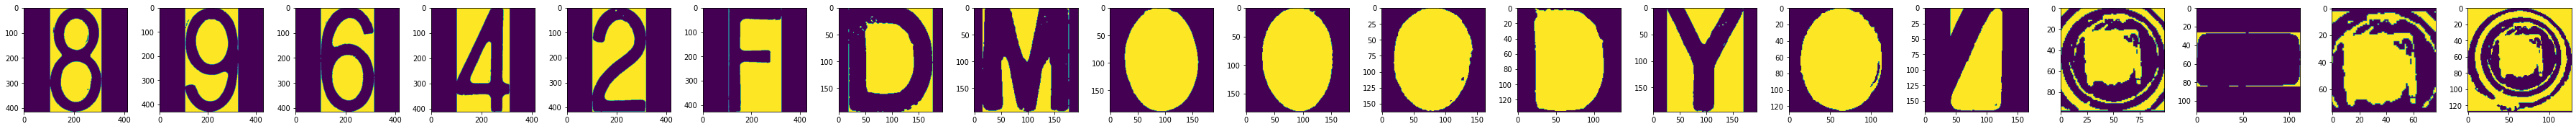

In [54]:
fig, axes = plt.subplots(nrows=1,ncols=len(sq)-1, figsize=(50, 3.8))
fig.tight_layout()
for i in range(len(sq)-1):
    axes[i].imshow(sq[i])

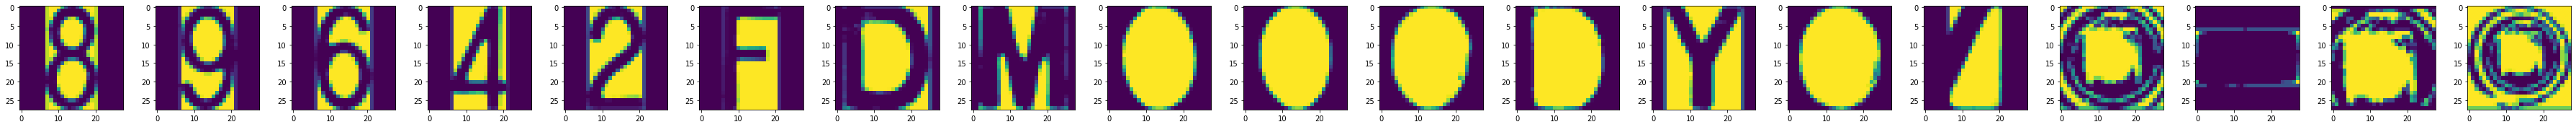

In [57]:
fig, axes = plt.subplots(nrows=1,ncols=len(cropped)-1, figsize=(50, 3.8))
fig.tight_layout()
for i in range(len(cropped)-1):
    axes[i].imshow(cropped[i])

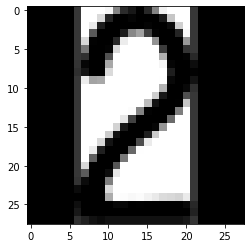

In [28]:
plt.imshow(cropped[4], cmap='gray')

In [25]:
len(cropped)

20

In [26]:
(x,y,w,h) = cv2.boundingRect(contours[0])

In [27]:
print(x,y,w,h)

0 0 1928 898


In [28]:
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
    print(x,y,w,h)

0 0 1928 898
32 39 1864 832
1320 373 204 414
192 360 219 431
1560 376 212 414
1077 375 209 412
830 371 215 417
449 367 217 427
907 114 157 194
697 113 161 194
235 408 136 189
1604 564 125 182
1361 587 126 163
937 140 93 136
1119 117 144 196
1374 417 101 127
1129 509 85 168
1477 108 99 98
696 524 112 58
56 32 392 29
1491 113 77 71
1461 96 128 127
1127 57 88 9
681 141 11 95
1254 61 81 10
681 237 9 58
713 629 19 22
1485 165 64 35
765 630 17 21
421 129 15 16
742 628 17 24
991 875 31 5
1548 178 16 16
1856 817 11 18
903 876 26 5
1497 215 18 9
1869 116 7 11
719 632 10 8
759 880 18 7
1460 483 12 31
921 380 8 8
687 525 7 11
1142 875 15 4
1567 142 4 13
1565 164 6 11
1871 133 8 5
192 5 6 11
1548 176 6 6
750 880 11 4
1489 145 4 10
1557 65 10 4
39 65 5 8
1157 875 8 5
196 426 5 11
1351 63 7 4
948 136 6 7
200 410 8 14
927 148 5 5
1337 63 7 4
502 170 9 5
565 50 10 3
1442 878 6 4
981 876 7 4
1502 119 6 4
1468 696 4 5
948 130 6 4
1849 827 5 5
957 135 4 6
869 877 6 4
1222 148 5 4
931 153 5 5
811 128 5 4


In [32]:
cv2.contourArea?

Docstring:
contourArea(contour[, oriented]) -> retval
.   @brief Calculates a contour area.
.   
.   The function computes a contour area. Similarly to moments , the area is computed using the Green
.   formula. Thus, the returned area and the number of non-zero pixels, if you draw the contour using
.   #drawContours or #fillPoly , can be different. Also, the function will most certainly give a wrong
.   results for contours with self-intersections.
.   
.   Example:
.   @code
.       vector<Point> contour;
.       contour.push_back(Point2f(0, 0));
.       contour.push_back(Point2f(10, 0));
.       contour.push_back(Point2f(10, 10));
.       contour.push_back(Point2f(5, 4));
.   
.       double area0 = contourArea(contour);
.       vector<Point> approx;
.       approxPolyDP(contour, approx, 5, true);
.       double area1 = contourArea(approx);
.   
.       cout << "area0 =" << area0 << endl <<
.               "area1 =" << area1 << endl <<
.               "approx poly vertices" << appro